## House Price Prediction

In [87]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [60]:
# load data
df = pd.read_csv(r'D:\ML\Machine_Learning\ML_files\Data sets\house price.csv')
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [61]:
df.shape

(157, 9)

## Data Cleaning

In [62]:
# check for Null values
df.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [63]:
# drop null values
df = df.dropna()

In [64]:
df.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [65]:
# check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
149    False
151    False
153    False
154    False
155    False
Length: 128, dtype: bool

In [66]:
# columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      128 non-null    float64
 1   Bedroom    128 non-null    float64
 2   Space      128 non-null    float64
 3   Room       128 non-null    float64
 4   Lot        128 non-null    float64
 5   Tax        128 non-null    float64
 6   Bathroom   128 non-null    float64
 7   Garage     128 non-null    float64
 8   Condition  128 non-null    float64
dtypes: float64(9)
memory usage: 10.0 KB


In [67]:
# statistics of the data
df.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,56.718750,3.195312,1109.382812,6.531250,32.664062,925.476562,1.488281,0.812500,0.226562
std,13.348708,1.392096,480.844011,1.724933,8.630907,435.174559,0.548674,0.810852,0.420252
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,809.750000,5.000000,25.000000,679.750000,1.000000,0.000000,0.000000
50%,56.000000,3.000000,963.500000,6.000000,30.000000,855.500000,1.500000,1.000000,0.000000
75%,64.000000,4.000000,1199.500000,7.000000,35.500000,1039.750000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


## EDA

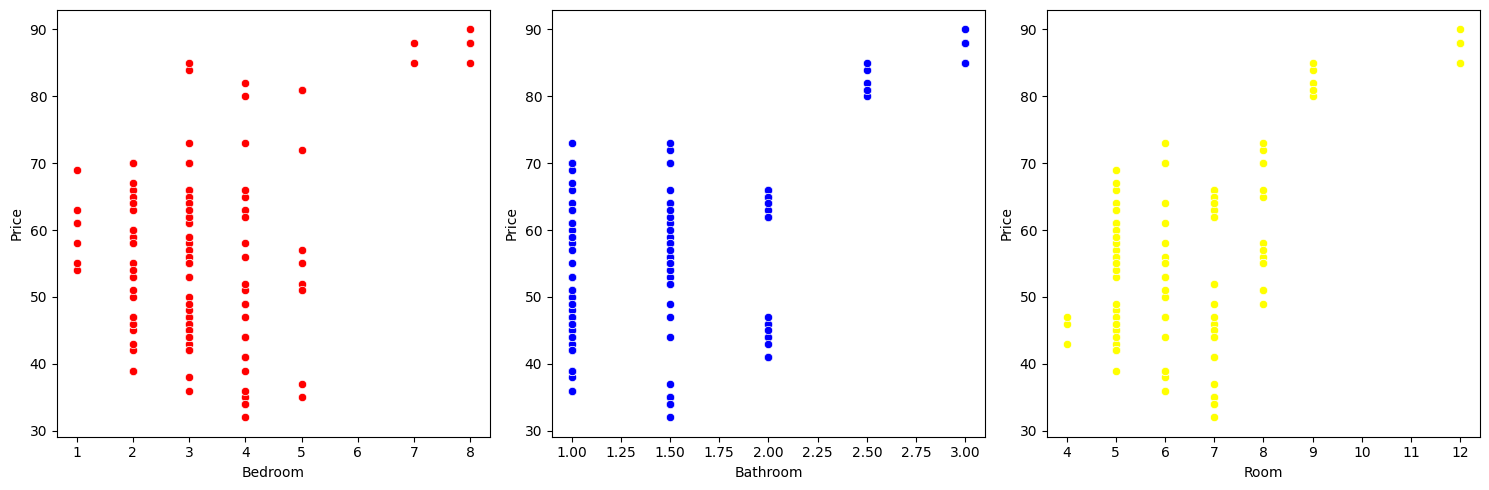

In [68]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(data=df,x='Bedroom',y='Price',ax=ax[0],color='red')
sns.scatterplot(data=df,x='Bathroom',y='Price',ax=ax[1],color='blue')
sns.scatterplot(data=df,x='Room',y='Price',ax=ax[2],color='yellow')

plt.tight_layout()
plt.show()

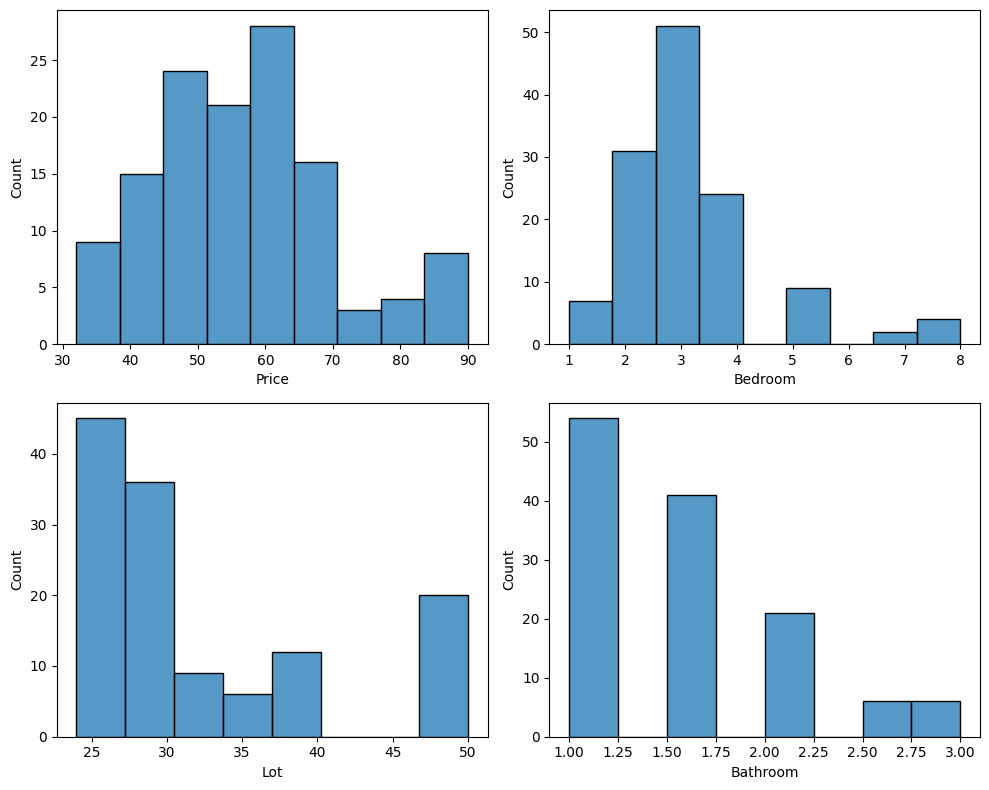

In [69]:
fig,ax = plt.subplots(2,2, figsize=(10,8))
sns.histplot(data=df,x='Price',ax=ax[0,0])
sns.histplot(data=df,x='Bedroom',ax=ax[0,1])
sns.histplot(data=df,x='Lot',ax=ax[1,0])
sns.histplot(data=df,x='Bathroom',ax=ax[1,1])

plt.tight_layout()
plt.show()

In [70]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


## Model Building

In [71]:
X = df.drop(columns='Price')
y = df['Price']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [99]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = r2_score(y_test,y_pred)

In [100]:
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.9411754965111712
